In [3]:
import numpy as np
import pandas as pd


In [6]:
df=pd.read_csv('./placement.csv')

###steps
##1.preprocess
##2.extract input and output cols
##3.scale the values
##4.train test split (traing and evaluating data)
##5.train the model
##6.evaluate the model/model selection
##7.deploy the model

In [7]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [20]:
df.shape

(100, 3)

###step 1 preprocessing -remove the serial number column from training data

In [11]:
df=df.iloc[:,1:]

In [12]:
df


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [14]:
import matplotlib.pyplot as plt


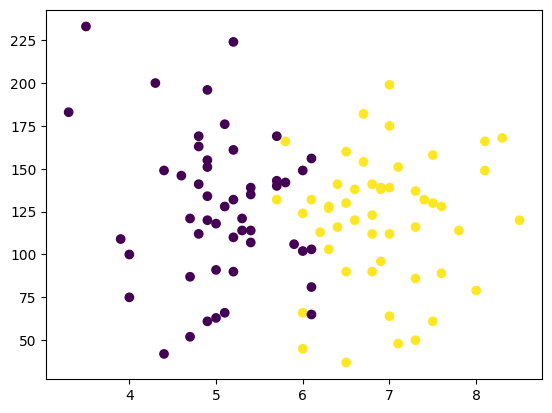

In [15]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

##step2 extract input and output columns

In [16]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [17]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
y.shape

(100,)

###step 4 (for checking purpose) train test split

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [22]:
x_train

,cgpa,iq
17,3.3,183.0
10,6.0,45.0
53,8.3,168.0
14,6.1,103.0
11,6.9,138.0
...,...,...
32,7.0,139.0
16,5.2,224.0
86,5.1,128.0
78,6.1,81.0


In [23]:
y_train

17    0
10    1
53    1
14    0
11    1
     ..
32    1
16    0
86    0
78    0
96    0
Name: placement, Length: 90, dtype: int64

In [24]:
x_test

,cgpa,iq
60,6.9,139.0
13,6.4,116.0
89,4.9,151.0
8,6.1,156.0
64,7.0,64.0
71,6.1,132.0
42,7.6,89.0
73,4.9,61.0
50,3.5,233.0
33,6.0,149.0


In [25]:
y_test

60    1
13    1
89    0
8     0
64    1
71    1
42    1
73    0
50    0
33    0
Name: placement, dtype: int64

###step 3 (u can do it before step 4 no problem,)
scale the values

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
x_train = scaler.fit_transform(x_train)

In [29]:
x_train

array([[-2.37255644e+00,  1.55278385e+00],
       [ 2.93270265e-03, -2.01729675e+00],
       [ 2.02649753e+00,  1.16473161e+00],
       [ 9.09137821e-02, -5.16828094e-01],
       [ 7.94762418e-01,  3.88627132e-01],
       [-9.64859171e-01,  2.85146535e-01],
       [ 1.32264889e+00,  9.06030118e-01],
       [-8.50483768e-02, -4.39217646e-01],
       [-9.64859171e-01,  8.28419670e-01],
       [ 1.32264889e+00,  1.81665937e-01],
       [ 1.76255429e+00, -1.13771168e+00],
       [ 1.41062997e+00,  1.29925639e-01],
       [ 2.20245969e+00, -7.70355557e-02],
       [ 7.06781338e-01,  4.66237580e-01],
       [-7.00915933e-01, -3.35737049e-01],
       [-9.64859171e-01, -7.70355557e-02],
       [-5.24953774e-01,  4.14497281e-01],
       [-2.61010536e-01,  5.17977878e-01],
       [ 8.82743497e-01,  1.34582266e+00],
       [-7.88897012e-01, -1.47402362e+00],
       [-7.00915933e-01,  2.33406236e-01],
       [ 8.82743497e-01,  1.96670624e+00],
       [-5.24953774e-01,  3.11016684e-01],
       [ 7.

In [30]:
x_test=scaler.transform(x_test)

In [31]:
x_test

array([[ 0.79476242,  0.41449728],
       [ 0.35485702, -0.18051615],
       [-0.96485917,  0.72493907],
       [ 0.09091378,  0.85428982],
       [ 0.8827435 , -1.52576392],
       [ 0.09091378,  0.23340624],
       [ 1.41062997, -0.87901018],
       [-0.96485917, -1.60337436],
       [-2.19659428,  2.84629132],
       [ 0.0029327 ,  0.67319877]])

###step 5 train the model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf=LogisticRegression()

In [34]:
clf.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

###step 6 model evaluation

In [35]:
y_pred=clf.predict(x_test)

In [36]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [37]:
(y_test)

60    1
13    1
89    0
8     0
64    1
71    1
42    1
73    0
50    0
33    0
Name: placement, dtype: int64

####check y_pred and y_test, how many predictions are correct

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.8

####check decision boundary which your model noticed during training, for this import mlxtend library

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

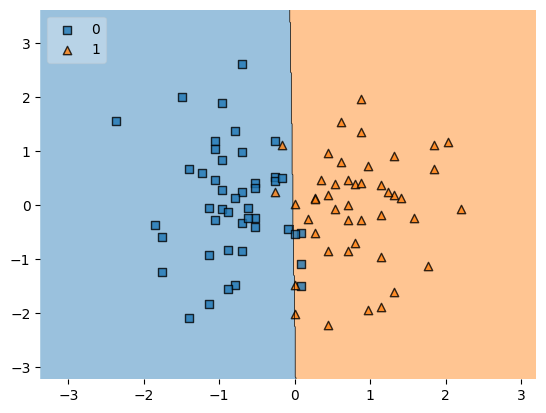

In [42]:
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

#### setp 7 deploy the model

#### convert the whole ipynb file into a deployed model

In [43]:
import pickle

In [44]:
pickle.dump(clf,open('model.pkl','wb'))